<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Logistic_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Logistic Regression

In [19]:
import sys
import urllib.request
import os

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

## Part1: Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

### Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part, the code will load the data and display it on a 2-dimensional plot where the axes are the two exam scores, and the positive and negative examples are shown with different marker colors.

In [20]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("log_reg_data1.csv", "log_reg_data2.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [21]:
#load data
data_exam = pd.read_csv(data_path + '/log_reg_data1.csv')
data_exam.head()

,studentId,score1,score2,admitted
0,1,34.623660,78.024693,0
1,2,30.286711,43.894998,0
2,3,35.847409,72.902198,0
3,4,60.182599,86.308552,1
4,5,79.032736,75.344376,1


### Get the parameters of the model

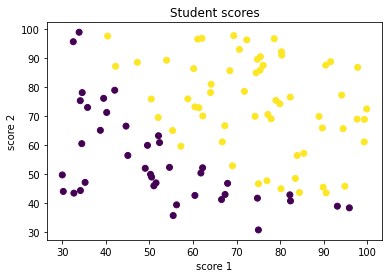

In [22]:
X = np.c_[data_exam[["score1","score2"]]]
y = np.c_[data_exam["admitted"]]

(m,n) = X.shape

# display all examples
fig = plt.figure()
plt.title('Student scores')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0],X[:,1], c=y.ravel())
plt.show()

#add a column of 1s to X
#X = np.insert(X, 0, values=1, axis=1)

$w_j$ = clf.coef_, $w_0$ = clf.intercept_

In [23]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y.ravel())

#print model parameters
print("w0 =", clf.intercept_[0], ", w1 = ", clf.coef_[0][0], ", w2 = ", clf.coef_[0][1])

w0 = -12.553234703609848 , w1 =  0.10289545363161186 , w2 =  0.10051268616818805


### Plot the decision boundary
The decision boundary correspends to the value $y = 0.5$. We can write $x_2$ in terms of $x_1$ by solving the following equation:
$$ 0.5 = w_0 + w_1*x_1 + w_2*x_2 $$

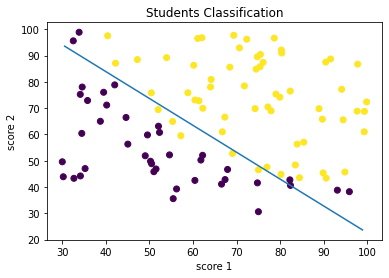

In [24]:
fig = plt.figure()
ax = plt.axes()
plt.title('Students Classification')
plt.xlabel('score 1')
plt.ylabel('score 2')
plt.scatter(X[:,0], X[:,1], c=y.ravel())

#generate new points to plot a decision boundary line
x1_vals = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
# the boundry is at line at y = 0.5 if y in {0,1} or y = 0 if y in {-1,1},   
# sklearn converts y to the range {-1,1}
# So, we can then write x2 in terms of x1 using: (w0 + w1*x1 + w2*x2 = 0)
x2_vals = -(clf.intercept_[0] + clf.coef_[0][0]*x1_vals) / clf.coef_[0][1]

# plot the line
plt.plot(x1_vals, x2_vals)
plt.show()

### Accuracy of the model
the score function measures how well the learned model predicts on a given set. 

In [25]:
#prediction probability of one example (the 5th example)
clf.predict_proba(X[5:6,:]) # the two probabilities sums up to 1.

#predicted class of an example (class with max probability)
clf.predict(X[5:6,:])

#prediction accuracy on the training set X
clf.score(X, y)

0.89

## Part 2: Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression using the ridge method to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### Load and Visualize the data
Similarly to the previous part, we will load and plot the data of the two QA test scores. The positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

In [26]:
data_microchip = pd.read_csv('datasets/log_reg_data2.csv')
data_microchip.head()

,microchipId,test1,test2,accepted
0,1,0.051267,0.69956,1
1,2,-0.092742,0.68494,1
2,3,-0.213710,0.69225,1
3,4,-0.375000,0.50219,1
4,5,-0.513250,0.46564,1


In [27]:
X = np.c_[data_microchip[["test1","test2"]]]
y = np.c_[data_microchip["accepted"]]

(m,n) = X.shape

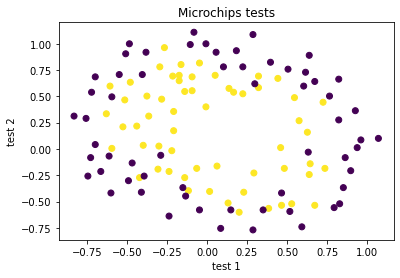

In [28]:
X1 = X[:,0]
X2 = X[:,1]

# display
fig = plt.figure()
plt.title('Microchips tests')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.show()

### Feature mapping
The scatter plot shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

One way to fit the data better is to create more features from each data point. Sklearn provide you with such transformation. PolynomialFeatures allow you to map the features into all polynomial terms of $x_1$ and $x_2$ up to the order power $order$:
$$(1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_1^2x_2, x_2^2x_1, x_2^3, ..., x_2^{order})$$

In [29]:
from sklearn.preprocessing import PolynomialFeatures

order = 30

poly = PolynomialFeatures(order)
Xmap = poly.fit_transform(X)

print(X.shape)
print(Xmap.shape)

(118, 2)
(118, 496)


As a result of a six order power mapping (order=6), our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

### fit a logistic regression model to the polynomial features

In [30]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=10**7).fit(Xmap, y.ravel())
w_star = clf.coef_[0]

### Plot the decision boundary

No handles with labels found to put in legend.


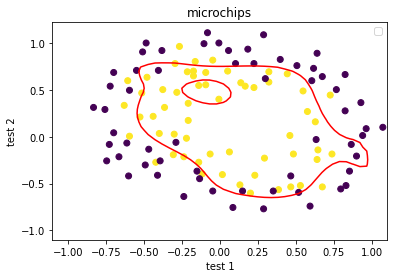

In [31]:
def get_boundary(u, v, theta, order):
    boundary = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            
            poly = PolynomialFeatures(order)
            uv = [np.array([u[i],v[j]])]
            poly_map = poly.fit_transform([np.array([u[i],v[j]])])
            boundary[i, j] = (poly_map[0].dot(np.array(theta)))

    return boundary

#plot data and boundary
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

boundary = get_boundary(u, v, w_star, order)

plt.title('microchips')
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary, 0, colors='red')
plt.legend()
plt.show()

### Evaluating the regularized logistic regression

In [32]:
clf.score(Xmap, y)

0.8813559322033898

## Tuning the hyper-parameters
Try tuning the two hyper-parameters ($C$ and the polynome order) and see how the decision boundary and the model's accuracy evolve.

### Use a grid search

In [33]:
acc = np.zeros((10, 20))

C_range = list(10**x for x in range (0, 10))

for idx, c in enumerate(C_range):
    print(idx, sep='.', end='', flush=True) 
    for order in range(1,21):
        poly = PolynomialFeatures(order)
        Xmap = poly.fit_transform(X)
        
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c).fit(Xmap, y)
        
        acc[idx,order-1] = clf.score(Xmap, y)

0123456789

### get  $\lambda^*$ and $order^*$ (those maximizing the accuracy)

(4, 10)
0.8983050847457628
c_star =  10000 , order_star =  10


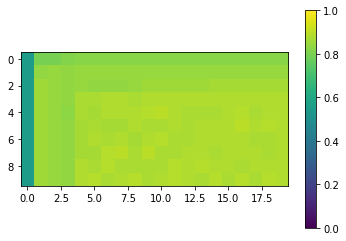

In [34]:
from numpy import unravel_index
acc_max_idx = unravel_index(acc.argmax(), acc.shape)
print(acc_max_idx)
print(acc[acc_max_idx[0], acc_max_idx[1]])


c_star = C_range[acc_max_idx[0]]
order_star = acc_max_idx[1]

print("c_star = ", c_star, ", order_star = ", order_star)


fig = plt.figure()
fig.clf()
ax = fig.add_subplot(1,1,1)
img = ax.imshow(acc, interpolation='nearest', vmin=0.0, vmax=1.0)
fig.colorbar(img)

plt.show()

### plot data and boundary

No handles with labels found to put in legend.


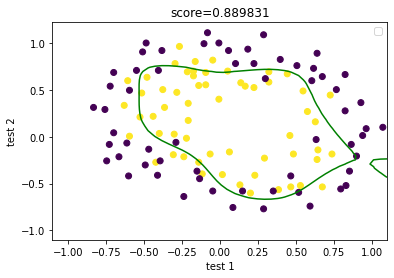

In [35]:
fig = plt.figure()

u = np.linspace(-1.1, 1.1, 50)
v = np.linspace(-1.1, 1.1, 50)

poly = PolynomialFeatures(order_star)
Xmap = poly.fit_transform(X)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', C=c_star).fit(Xmap, y)
theta_star =  clf.coef_[0]     


boundary_green = get_boundary(u, v, theta_star, order_star)

plt.title('score=%f' %clf.score(Xmap, y))
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.scatter(X1,X2, c=y.ravel())
plt.contour(u, v, boundary_green, 0, colors='green')
plt.legend()
plt.show()

## Exercise

In [36]:
#1) use pipelines
#1) try GridSearch and Randomised Search
#2) try SVM with different Kernels
#3) try GridSearch and Randomised Search

In [39]:
#1
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.88

In [40]:
#2
""""Search for the Parameters consists of following:

    an estimator - in our case it is RandomForestRegressor
    a parameter space - this the grid we have passed onto the GridSearchCV
    a method for searching or sampling candidates - we have seen GridsearchCV   and other one is RandomizedSearchCV
    a cross-validation scheme
    a scoring function - evaluates the parameters

GridSearchCV is an exhaustive search or say it is a brute force technique.
RandomizedSearchCV as the name mentions does a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. Which is far more efficient in searching the parameter values for fine tuning # Randomized Search

Grid Search:
The above models were run with the default parameters determined by the LogisticRegression. we can improve the model by tuning the hyperparameters of the model?


To achieve this, we define a “grid” of parameters that we would want to test out in the model and select the best model using GridSearchCV.
"""

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8821428571428571


In [41]:
#3

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score

data_exam.head()

X = np.c_[data_exam[["score1","score2"]]]
y = np.c_[data_exam["admitted"]]

#define a seed for reproducibility
seed = 1

# Splitting data into the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

# Define scoring method
scoring = 'accuracy'
# Trying linear, RBF and sigmoid kernels
names = ['SVM Linear', 'SVM RBF', 'SVM Sigmoid']
Classifiers = [
    svm.SVC(kernel = 'linear'),
    svm.SVC(kernel = 'rbf'),
    svm.SVC(kernel = 'sigmoid')
    
    ]
models = zip(names, Classifiers)

names = []
result = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

#.Model's Evaluation

models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

"""Support Vector Machine with 'linear'and RBF kernels performed best with F1_score = 0.88 on testing data.
while SVM with sigmoid kernel has an F1_score = 0.56 on testing data


SVM Linear: 0.8839285714285715 (0.08829810939340083)
SVM RBF: 0.8821428571428571 (0.09388171020067797)
SVM Sigmoid: 0.6160714285714286 (0.15345718341888445)
SVM Linear
0.88
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.87      0.93      0.90        14

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.88        25
weighted avg       0.88      0.88      0.88        25

SVM RBF
0.88
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.87      0.93      0.90        14

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.88        25
weighted avg       0.88      0.88      0.88        25

SVM Sigmoid
0.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.56      1.00 